# <div style="text-align: center"> Applied Machine Learning Kaggle Challenge</div>

###### <div style="text-align: right">Devansh Agarwal<br>ES16BTECH11009<br><br>Udit Maniyar<br> ES16BTECH11024 </div>

# Models Tried

 - XGBoost
 - SVM
 - Bernoulli NB
 - Multinomial NB
 - Complement NB
 - ExtraTrees Classifier
 - Logistic Regression Classifier
 - MultiLayer Perceptron
 - Nearest Centroid Classifier
 - Radius Neighbour Classifier
 - Ridge Regression Classifer
 - Quadratic Discriminant Analysis
 - SGD Classifier
 - Passive Agressive Classifier
 - Random Forest
 - Voting Classifier
 - Adaboost 

# Preprocessing

#### One Hot encoding
Few of the attributes are of Categorical type so we converted them to binary representations 
Attributes Changed : taxi_type,ccustomer_score_confidence, drop_location_type , sex    

#### Removal of Outliers

We made scatter plots and box plots for all contious variables and removed Few of the Points in the data which are not reasonable enogh.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
def pltter(one,two):
    train = pd.read_csv("train.csv")
#     print(train.columns)
    sns.lmplot( x=one, y=two, data=train, fit_reg=False,order = 100, hue='pricing_category', legend=True,scatter_kws={'s':1})
    plt.legend(loc='lower right')
    plt.show()

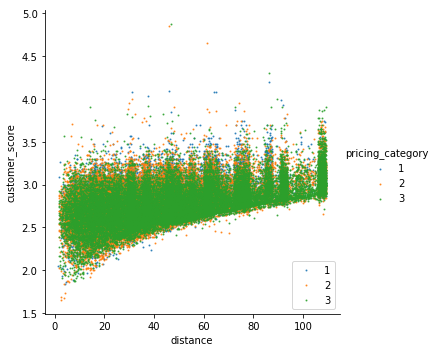

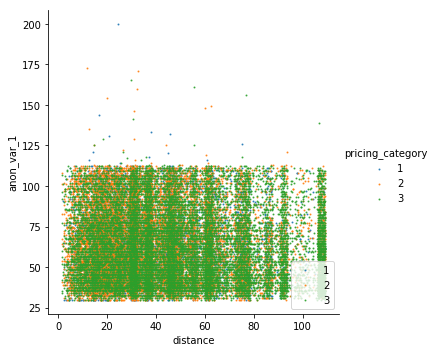

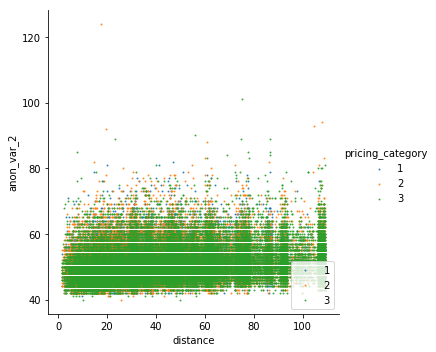

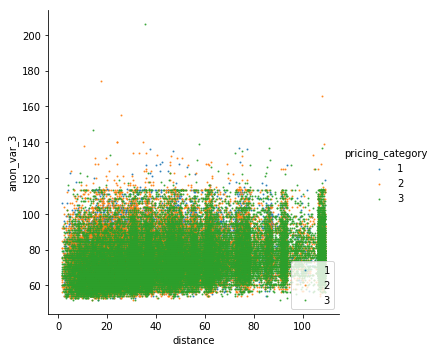

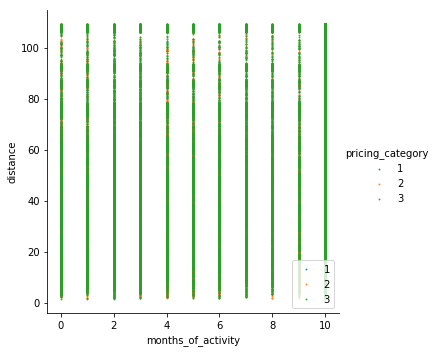

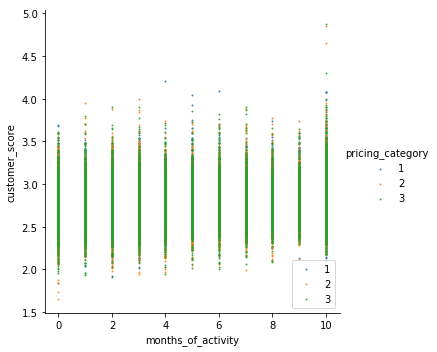

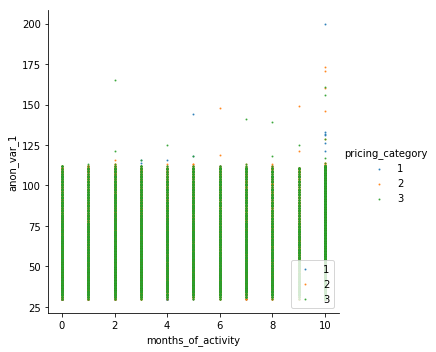

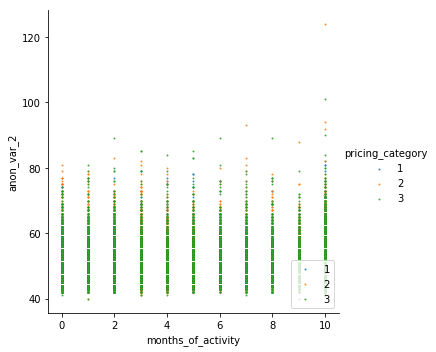

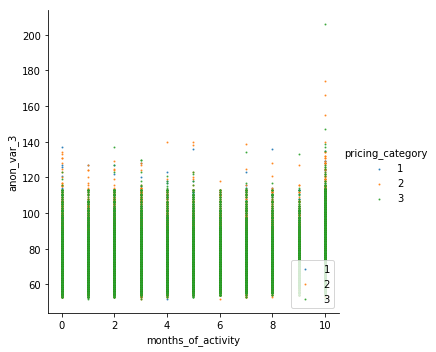

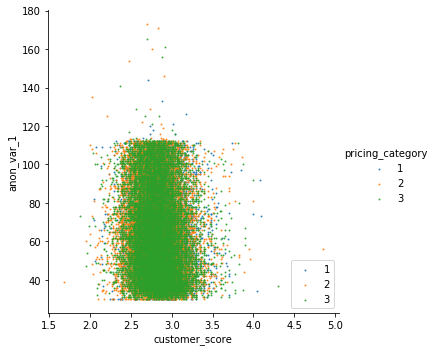

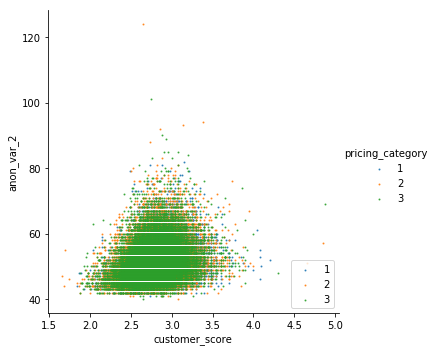

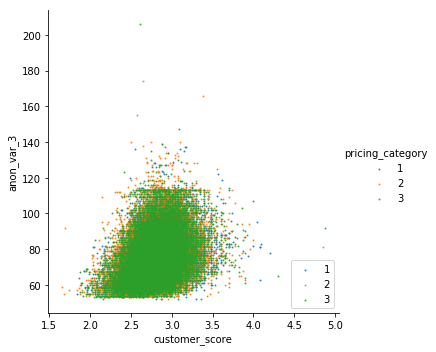

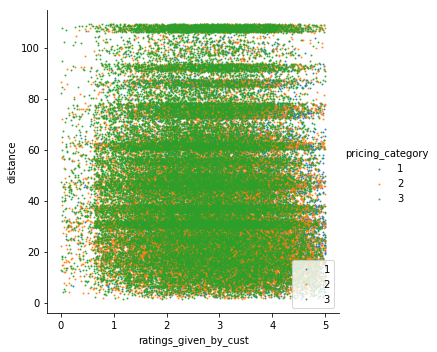

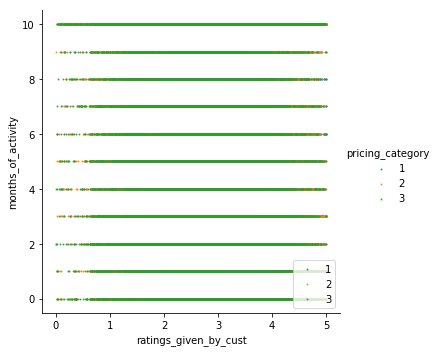

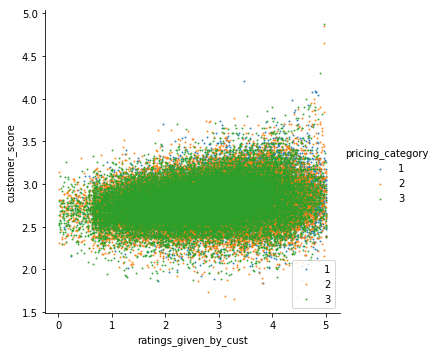

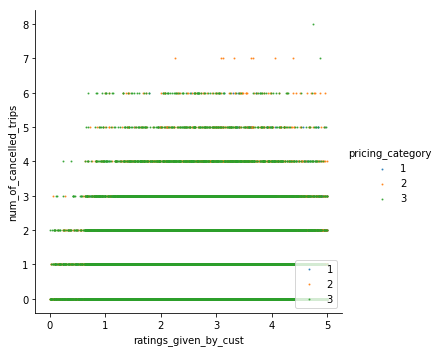

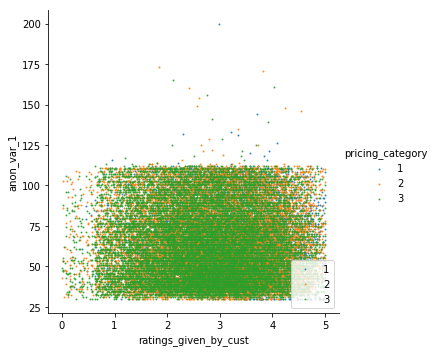

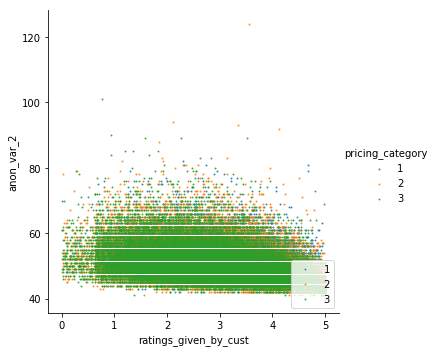

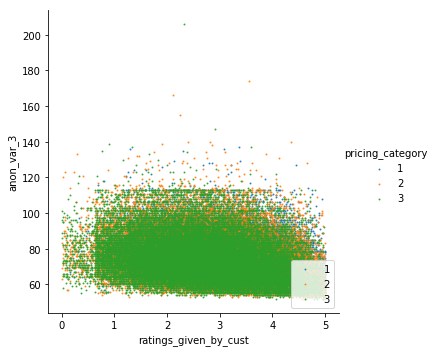

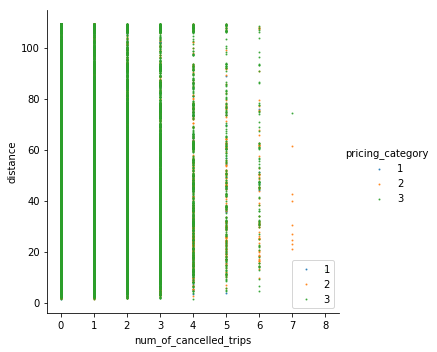

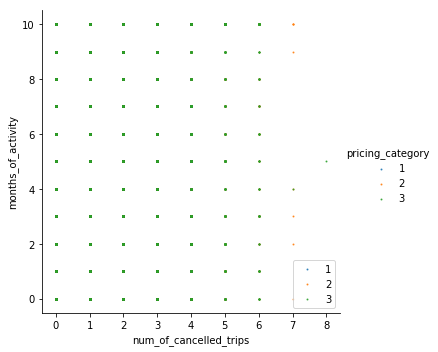

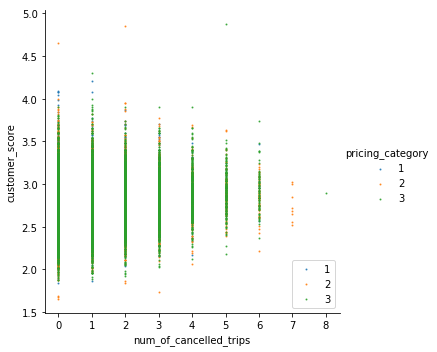

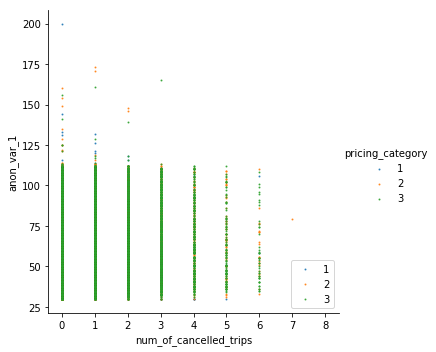

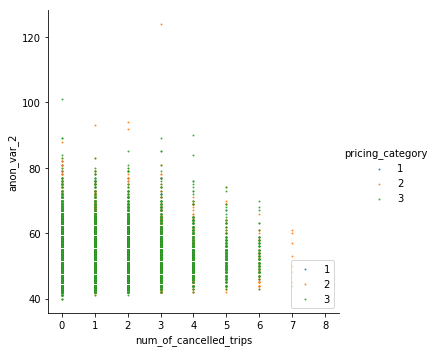

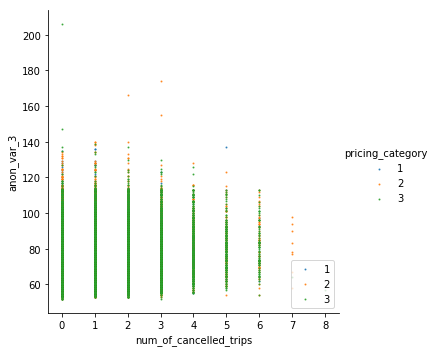

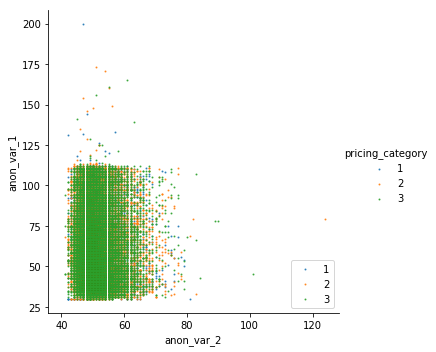

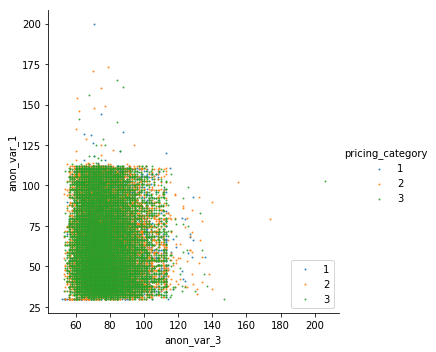

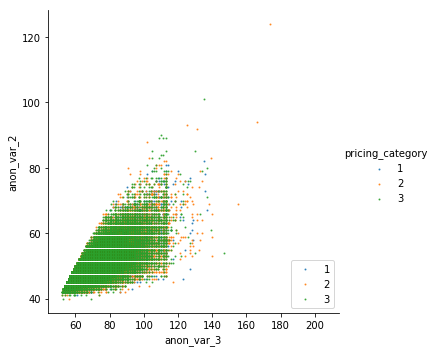

In [2]:
continuos_var = ["distance","months_of_activity","customer_score","ratings_given_by_cust","num_of_cancelled_trips","anon_var_1","anon_var_2","anon_var_3"]
for i in continuos_var:
    for j in continuos_var:
        if i > j:
            pltter(i,j)


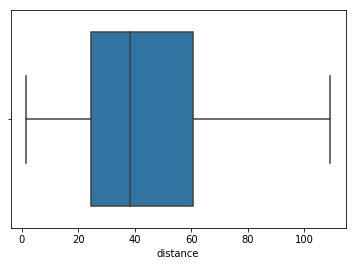

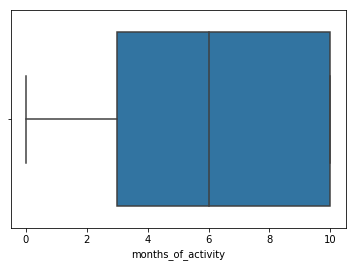

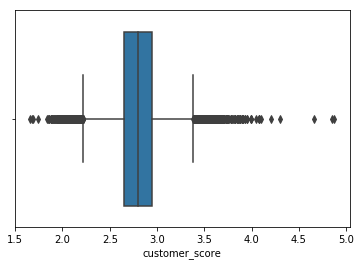

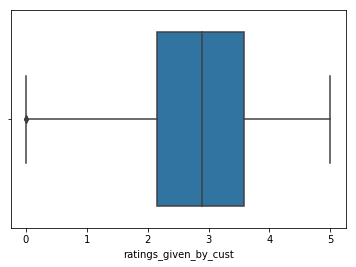

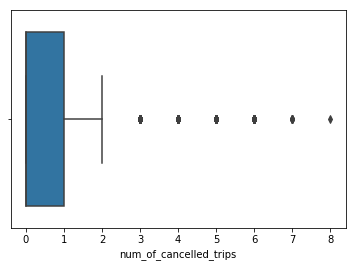

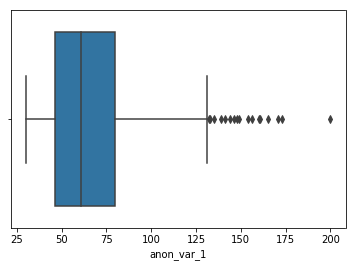

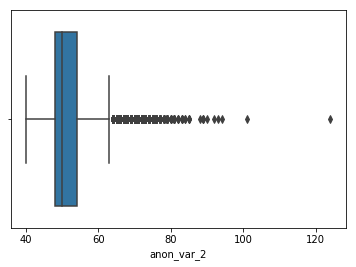

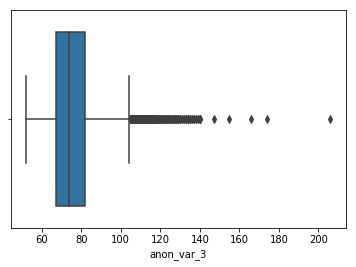

In [3]:
import numpy as np
def boxplot():
    train = pd.read_csv("train.csv")

    continuos_var = ["distance","months_of_activity","customer_score","ratings_given_by_cust","num_of_cancelled_trips","anon_var_1","anon_var_2","anon_var_3"]
    for i in continuos_var:
        data = train[i]
        filtered_data = data[~np.isnan(data)]
        sns.boxplot(x = filtered_data)
        plt.show()
boxplot()

###### Outliers were found out and removed

### Imputing

Many of the features Contain Nan Values. To run the classifier on the data we need to eliminate the Nan Values.


In [4]:
train = pd.read_csv("train.csv")
print(train.isna().sum())

id                               0
distance                         0
taxi_type                    12152
months_of_activity            3533
customer_score               12041
customer_score_confidence    12041
drop_location_type               0
ratings_given_by_cust            0
num_of_cancelled_trips           0
anon_var_1                   42419
anon_var_2                       0
anon_var_3                       0
sex                              0
pricing_category                 0
dtype: int64


Since the number of Nan values in anon_var_1 is very high we Added a new attribute to the data calling anon1_isnan
which is 1 if the value of anon_var_1 is nan and 0 otherwise<br>

Imputing of Nan values in months_of_activity was done by median.<br>
Imputing of Nan values in months_of_activity was done by mean.<br>
anon_var_1 was imputed using mean.<br>

We need not impute the categorical variables because it is encoded using one hot encoding

### BOXCOX Transform

Tried Using BoxCox Transform on Few Continous Variables but the accuracy did not increase.

# Code

In [5]:
import pandas as pd
import numpy as np
import csv
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sys
from sklearn.impute import SimpleImputer
import random
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,ComplementNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV,RidgeClassifier,RidgeClassifierCV, SGDClassifier, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [6]:
def read_train():
    train = pd.read_csv("train.csv")    
    #Removal of Outliers from the data
    train = train[~(train['num_of_cancelled_trips'] >= 6)]
    train = train[~(train['anon_var_1'] >=115)]
    train = train[~(train['anon_var_2'] >= 70)]
    train = train[~(train['anon_var_3'] >= 110 )]
    train = train[~(2>train['customer_score'])]
    train = train[~(train['customer_score']>=3.7 )]
    print(train.columns)
    return train

In [7]:
def hotenc(train):
    mf1 = pd.get_dummies(train['taxi_type'])
    train = train.drop('taxi_type',axis = 1)
    train = train.join(mf1,rsuffix='_Taxitype')

    mf2 = pd.get_dummies(train['customer_score_confidence'])
    train = train.drop('customer_score_confidence',axis = 1)
    train = train.join(mf2,rsuffix='_Customerscore_confidence')

    mf = pd.get_dummies(train['drop_location_type'])
    train = train.drop('drop_location_type',axis = 1)
    train = train.join(mf,rsuffix='_drop_location_type')

    mf = pd.get_dummies(train['sex'])
    train = train.drop('sex',axis = 1)
    train = train.join(mf,rsuffix='sex')
    
    return train

In [8]:
def imputer(data,test):
    
    imp_mean1 = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp_mean2 = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

    
    dat = np.array(data["customer_score"])
    imp_mean1.fit(np.resize(dat,(len(dat),1)))
    dat = imp_mean1.transform(np.resize(dat,(len(dat),1)))
    data["customer_score"] = dat
    dat = np.array(test["customer_score"])
    dat = imp_mean1.transform(np.resize(dat,(len(dat),1)))
    test["customer_score"] = dat

    
    
    dat = np.array(data["anon_var_1"])
    imp_mean2.fit(np.resize(dat,(len(dat),1)))
    dat = imp_mean2.transform(np.resize(dat,(len(dat),1)))
    data["anon_var_1"] = dat
    dat = np.array(test["anon_var_1"])
    dat = imp_mean1.transform(np.resize(dat,(len(dat),1)))
    test["anon_var_1"] = dat
    
    
    dat = np.array(data["months_of_activity"])
    imp_median.fit(np.resize(dat,(len(dat),1)))
    dat = imp_median.transform(np.resize(dat,(len(dat),1)))
    data["months_of_activity"] = dat    
    dat = np.array(test["months_of_activity"])
    dat = imp_median.transform(np.resize(dat,(len(dat),1)))
    test["months_of_activity"] = dat

    return data, test


In [9]:
train_data = read_train()
train_data = hotenc(train_data)
test_data = pd.read_csv("test.csv")
test_data = hotenc(test_data)
train_data, test_data = imputer(train_data,test_data)

Index(['id', 'distance', 'taxi_type', 'months_of_activity', 'customer_score',
       'customer_score_confidence', 'drop_location_type',
       'ratings_given_by_cust', 'num_of_cancelled_trips', 'anon_var_1',
       'anon_var_2', 'anon_var_3', 'sex', 'pricing_category'],
      dtype='object')


In [10]:
data_test = test_data
data_train = train_data

In [12]:
#Run only if you want to test the data and dont want to submit

data_train,data_test = train_test_split(train_data, test_size=0.2, shuffle = True)

data_train, data_test = imputer(data_train,data_test)
# data_train, data_test = boxCoxTransform(data_train,data_test)

# SVM

In [13]:
def svm(training_data,testing_data):
    ytrain = training_data["pricing_category"]
    xtrain = training_data.drop("pricing_category",axis = 1)
    xtrain = xtrain.drop("id",axis = 1)
    
#     ytest = testing_data["pricing_category"]
#     xtest = testing_data.drop("pricing_category",axis = 1)
    xtest = xtest.drop("id",axis = 1)
    
    
    clf = OneVsRestClassifier(SVC(kernel = "rbf"),n_jobs =-1)
    clf.fit(xtrain, ytrain)    
    outcome = clf.predict(xtest)

#     accuracy = accuracy_score(ytest,outcome)
#     print("Accuracy", accuracy,sep = " : ")

In [14]:
print(data_test.shape)
print(data_train.shape)

(15535, 34)
(62138, 34)


In [ ]:
svm(data_train,data_test)

SVM (With RBF Kernel) Tested on 20% of the data was giving Accuracy of 66%

### Bernoulli Naive Bayes

In [15]:
def BernoulliNb(training_data,testing_data):
    ytrain = training_data["pricing_category"]
    xtrain = training_data.drop("pricing_category",axis = 1)
    
    xtrain = xtrain.drop("id",axis = 1)
    
    xtest = testing_data
#     ytest = testing_data["pricing_category"]
#     xtest = testing_data.drop("pricing_category",axis = 1)
    ids = xtest["id"]
    xtest = xtest.drop("id",axis = 1)
    
    clf = BernoulliNB(alpha = 0.000001,class_prior=[1,6,3])
    clf.fit(xtrain, ytrain)

    outcome = clf.predict(xtest)
    
    ids = np.array(ids)
    ids = np.resize(ids,(len(ids),1))
    outcome = [[float(i)] for i in outcome]
    outcome = np.resize(outcome,(len(outcome),1))
    
    
    outcome = np.hstack((ids,outcome))
    with open('NB.csv', 'w') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerows(outcome)

    csvFile.close()

Bernoulli Naive Bayes gave an accuracy of 68%

### Multinomial Naive Bayes

In [16]:
def Multinomial(training_data,testing_data):
    ytrain = training_data["pricing_category"]
    xtrain = training_data.drop("pricing_category",axis = 1)
    
    xtrain = xtrain.drop("id",axis = 1)
    
    xtest = testing_data
#     ytest = testing_data["pricing_category"]
#     xtest = testing_data.drop("pricing_category",axis = 1)
    ids = xtest["id"]
    xtest = xtest.drop("id",axis = 1)
    
    clf = MultinomialNB(alpha = 0.000001,class_prior=[1,6,3])

    clf.fit(xtrain, ytrain)
    outcome = clf.predict(xtest)
    
    ids = np.array(ids)
    ids = np.resize(ids,(len(ids),1))
    outcome = [[float(i)] for i in outcome]
    outcome = np.resize(outcome,(len(outcome),1))
    
    
    outcome = np.hstack((ids,outcome))
    
    with open('MultiNB.csv', 'w') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerows(outcome)

    csvFile.close()

Multinomial Naive Bayes Gave accuracy of 56% before adding one new attribute for anon_var_1, but gave an accuracy of 68% after adding new attribute

### Complement Naive Bayes

In [17]:
def CompNb(training_data,testing_data):
    ytrain = training_data["pricing_category"]
    xtrain = training_data.drop("pricing_category",axis = 1)
    xtrain = xtrain.drop("id",axis = 1)
    
    ytest = testing_data["pricing_category"]
    xtest = testing_data.drop("pricing_category",axis = 1)
    xtest = xtest.drop("id",axis = 1)
    
    clf = ComplementNB()
    clf.fit(xtrain, ytrain)
    outcome = clf.predict(xtest)

    accuracy = accuracy_score(ytest,outcome)
    print(accuracy)

### Logistic Regression

In [18]:
def LogReg(training_data,testing_data):
    ytrain = training_data["pricing_category"]
    xtrain = training_data.drop("pricing_category",axis = 1)
    xtrain = xtrain.drop("id",axis = 1)
    
    ytest = testing_data["pricing_category"]
    xtest = testing_data.drop("pricing_category",axis = 1)
    xtest = xtest.drop("id",axis = 1)
    
    clf = LogisticRegression(solver = "saga", max_iter = 1000,multi_class = 'multinomial',n_jobs = -1)
    clf.fit(xtrain, ytrain)
    outcome = clf.predict(xtest)
    

    accuracy = accuracy_score(ytest,outcome)
    print(accuracy)

### Multi Layer Perceptron

In [19]:
def MLP(training_data,testing_data):
    ytrain = training_data["pricing_category"]
    xtrain = training_data.drop("pricing_category",axis = 1)
    xtrain = xtrain.drop("id",axis = 1)
    
    ytest = testing_data["pricing_category"]
    xtest = testing_data.drop("pricing_category",axis = 1)
    xtest = xtest.drop("id",axis = 1)
    
    clf = MLPClassifier(activation = "logistic",solver = "sgd",learning_rate = 'adaptive', max_iter = 400)
    clf.fit(xtrain, ytrain)
    outcome = clf.predict(xtest)


    accuracy = accuracy_score(ytest,outcome)
    print(accuracy)

### Near Centroid Classifier

In [20]:
def NearCentroid(training_data,testing_data):
    ytrain = training_data["pricing_category"]
    xtrain = training_data.drop("pricing_category",axis = 1)
    xtrain = xtrain.drop("id",axis = 1)
    
    ytest = testing_data["pricing_category"]
    xtest = testing_data.drop("pricing_category",axis = 1)
    xtest = xtest.drop("id",axis = 1)
    
    clf = NearestCentroid()
    clf.fit(xtrain, ytrain)
    outcome = clf.predict(xtest)

    accuracy = accuracy_score(ytest,outcome)
    print(accuracy)

### Ridge Regression Classifier

In [21]:
def Ridgereg(training_data,testing_data):
    ytrain = training_data["pricing_category"]
    xtrain = training_data.drop("pricing_category",axis = 1)
    xtrain = xtrain.drop("id",axis = 1)
    
    ytest = testing_data["pricing_category"]
    xtest = testing_data.drop("pricing_category",axis = 1)
    xtest = xtest.drop("id",axis = 1)
    
    clf = RidgeClassifier(alpha = 1,normalize=True,solver = 'sag')
    clf.fit(xtrain, ytrain)
    outcome = clf.predict(xtest)
    
    accuracy = accuracy_score(ytest,outcome)
    print(accuracy)

### QuadraticDiscriminant Analysis

In [22]:
def QuadraticDiscriminantAna(training_data,testing_data):
    ytrain = training_data["pricing_category"]
    xtrain = training_data.drop("pricing_category",axis = 1)
    xtrain = xtrain.drop("id",axis = 1)
    
    ytest = testing_data["pricing_category"]
    xtest = testing_data.drop("pricing_category",axis = 1)
    xtest = xtest.drop("id",axis = 1)
    
    clf = QuadraticDiscriminantAnalysis()
    clf.fit(xtrain, ytrain)
    outcome = clf.predict(xtest)
    accuracy = accuracy_score(ytest,outcome)
    print(accuracy)

### SGD Classifier

In [23]:
def SGDClassy(training_data,testing_data):
    ytrain = training_data["pricing_category"]
    xtrain = training_data.drop("pricing_category",axis = 1)
    xtrain = xtrain.drop("id",axis = 1)
    
    ytest = testing_data["pricing_category"]
    xtest = testing_data.drop("pricing_category",axis = 1)
    xtest = xtest.drop("id",axis = 1)
    
    clf = SGDClassifier(loss='modified_huber',penalty='elasticnet',alpha = 0.001,n_jobs = -1,fit_intercept=True)
    clf.fit(xtrain, ytrain)
    outcome = clf.predict(xtest)
    
    accuracy = accuracy_score(ytest,outcome)
    print(accuracy)

### Passive Aggressive Classifier

In [24]:
def PassiveAggressiveClass(training_data,testing_data):
    ytrain = training_data["pricing_category"]
    xtrain = training_data.drop("pricing_category",axis = 1)
    xtrain = xtrain.drop("id",axis = 1)
    
    ytest = testing_data["pricing_category"]
    xtest = testing_data.drop("pricing_category",axis = 1)
    xtest = xtest.drop("id",axis = 1)
    
    clf = PassiveAggressiveClassifier(n_iter = 200,fit_intercept=True,tol = 0.0001,validation_fraction = 0.77,n_jobs = -1)
    clf.fit(xtrain, ytrain)
    outcome = clf.predict(xtest)
    
    accuracy = accuracy_score(ytest,outcome)
    print(accuracy)

### Random Forest Classifier

In [25]:
def RandomForestClassi(training_data,testing_data):
    ytrain = training_data["pricing_category"]
    xtrain = training_data.drop("pricing_category",axis = 1)
    xtrain = xtrain.drop("id",axis = 1)
    
    ytest = testing_data["pricing_category"]
    xtest = testing_data.drop("pricing_category",axis = 1)
    xtest = xtest.drop("id",axis = 1)

    clf = RandomForestClassifier( n_estimators = 500, criterion = 'gini',max_depth = 8, n_jobs = -1,oob_score = True,bootstrap = 0.77,max_features='sqrt')
    clf.fit(xtrain, ytrain)
    outcome = clf.predict(xtest)
    
    accuracy = accuracy_score(ytest,outcome)
    print(accuracy)

### Ada Boost

In [26]:
from sklearn.ensemble import AdaBoostClassifier
def AdaBoostClass(training_data,testing_data):
    ytrain = training_data["pricing_category"]
    xtrain = training_data.drop("pricing_category",axis = 1)
    xtrain = xtrain.drop("id",axis = 1)
    
    ytest = testing_data["pricing_category"]
    xtest = testing_data.drop("pricing_category",axis = 1)
    xtest = xtest.drop("id",axis = 1)

    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),n_estimators=600,learning_rate=0.7)
    clf.fit(xtrain, ytrain)

    outcome = clf.predict(xtest)
    accuracy = accuracy_score(ytest,outcome)
    print(accuracy)


In [ ]:
AdaBoostClass(data_train,data_test)

### Voting Classifier

In [27]:
def Voting(training_data,testing_data):

    # def Voting(training_data,testing_data):
    training_data = data_train.copy()
    testing_data = data_test.copy()

    ytrain = training_data["pricing_category"]
    xtrain = training_data.drop("pricing_category",axis = 1)
    tag = testing_data["id"]
    xtrain = xtrain.drop("id",axis = 1)

    #     ytest = testing_data["pricing_category"]
    #     xtest = testing_data.drop("pricing_category",axis = 1)
    xtest = testing_data.drop("id",axis = 1)


    clf1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),n_estimators=5000,learning_rate=1)
    clf2 = RandomForestClassifier( n_estimators = 5000, criterion = 'gini',max_depth = 4, n_jobs = -1,oob_score = True,bootstrap = 0.7,max_features='sqrt')
    clf3 = XGBClassifier(nthread=-1,max_depth = 4, learning_rate=0.01,n_estimators=5000,subsample=0.7,colsample_bynode=0.75,min_child_weight = 5,verbose = 0)


    eclf = VotingClassifier(estimators=[('1', clf1), ('2',clf2),('3',clf3)],voting='soft',n_jobs=-1)
    eclf.fit(xtrain, ytrain)

    outcome = eclf.predict(xtest)

    tag = np.array(tag)

    tag = np.reshape(tag,(len(tag),1))
    outcome = [[float(i)] for i in outcome]

    final = np.hstack((tag,outcome))

    with open('Fuckin.csv', 'w') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerows(final)

    csvFile.close()


In [ ]:
Voting(data_train,data_test)

### Bayesian Optimisation for Hyperparameter Tuning

In [29]:
def xgb_evaluate(learning_rate,max_depth, gamma, colsample_bytree,n_estimators):
    params = {'learning_rate': learning_rate,'max_depth': int(max_depth),'subsample': 0.8,'eta': 0.1,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree,
             'n_estimators' : n_estimators}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=400, nfold=3)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [ ]:
dtrain = xgb.DMatrix(xtrain, label=ytrain)

In [ ]:
xgb_bo = BayesianOptimization(xgb_evaluate, {'learning_rate': (0.01, 1.0),'max_depth': (3, 7), 'gamma': (0, 1),'colsample_bytree': (0.3, 0.9),'n_estimators': (200, 500)})
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=10, acq='ei')
print(np.array(xgb_bo.res))

In [ ]:
params = xgb_bo.res[2]['params']
params['max_depth'] = int(params['max_depth'])

In [ ]:
model2 = xgb.train(params, dtrain, num_boost_round=400)


tets = xgb.DMatrix(xtest)

# Predict on testing and training set
y_pred = model2.predict(tets)
# y_train_pred = model2.predict(xtrain)

# Report testing and training RMSE
print(np.sqrt(mean_squared_error(ytest, y_pred)))
# print(np.sqrt(mean_squared_error(ytrain, y_train_pred)))

### Final Submission 1

This uses xgboost with tuned hyperparameters and data pre processing as described above.The corresponding kaggle submission is:Xgboostoutlierndtuned5000Trees.csv. We used xgboost as it is an ensemble method that uses gradient boosting and it was giving better performance than other ensemble methods. Ensemble methods have been battle tested and proven to perform.

In [ ]:
import pandas as pd
import numpy as np
import csv
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
# import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import sys



train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(train.isna().sum())
print(train.shape)

print(test.isna().sum())
print(test.shape)

def trim():
    train = pd.read_csv("train.csv")

    print(train.shape)
    
    train = train[~(train['num_of_cancelled_trips'] >= 6)]
    
    print(train.shape)

    
    train = train[~(train['anon_var_1'] >=115)]

    print(train.shape)

    
    train = train[~(train['anon_var_2'] >= 70)]
    print(train.shape)
    
    train = train[~(train['anon_var_3'] >= 110 )]

    print(train.shape)
    
    train = train[~(2>= train['customer_score'])]

    print(train.shape)
    
    train = train[~(train['customer_score']>=3.7 )]
    
    print(train.shape)
    return train
train = trim()    

train.shape

# simple

# train  = train.drop('anon_var_1',axis = 1)
# test = test.drop('anon_var_1',axis = 1)



mf = pd.get_dummies(train['taxi_type'])
train = train.drop('taxi_type',axis = 1)
train = train.join(mf,rsuffix='_Taxitype')


mf = pd.get_dummies(train['customer_score_confidence'])
train = train.drop('customer_score_confidence',axis = 1)
train = train.join(mf,rsuffix='_Customerscore_confidence')

mf = pd.get_dummies(train['drop_location_type'])
train = train.drop('drop_location_type',axis = 1)
train = train.join(mf,rsuffix='drop_location_type')


mf = pd.get_dummies(train['sex'])
train = train.drop('sex',axis = 1)
train = train.join(mf,rsuffix='sex')



print(train.sample(10))

Y = train['pricing_category']
train = train.drop('pricing_category',axis =1)

print(train)
train = np.array(train)
# test = np.array(test)

X = train[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0,shuffle = True)

mf = pd.get_dummies(test['taxi_type'])
test = test.drop('taxi_type',axis = 1)
test = test.join(mf,rsuffix='_Taxitype')


mf = pd.get_dummies(test['customer_score_confidence'])
test = test.drop('customer_score_confidence',axis = 1)
test = test.join(mf,rsuffix='_Customerscore_confidence')

mf = pd.get_dummies(test['drop_location_type'])
test = test.drop('drop_location_type',axis = 1)
test = test.join(mf,rsuffix='drop_location_type')


mf = pd.get_dummies(test['sex'])
test = test.drop('sex',axis = 1)
test = test.join(mf,rsuffix='sex')


# y_test = test['pricing_category']
# test = test.drop('pricing_category',axis =1)


test = np.array(test)
X_test = test[:,1:]

clf = XGBClassifier(nthread=-1,max_depth = 5, learning_rate=0.01,n_estimators=5000,subsample=0.7,colsample_bynode=0.75,verbosity = 0)
# clf = XGBClassifier(nthread=-1,max_depth = 4, learning_rate=0.01,n_estimators=5000,subsample=0.7,colsample_bynode=0.75,verbosity = 0)
clf.fit(X_train, y_train)
print(clf.feature_importances_)

y_pred = clf.predict(X_test)
predictions = [float(value) for value in y_pred]


a= clf.feature_importances_
a.sort()
print (a)


tag = test[:,0]

    
tag = np.reshape(tag,(len(tag),1))
predictions = np.reshape(predictions,(len(predictions),1))
final = np.hstack((tag,predictions))

    
print(final)

print(final)

with open('Xgboost.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(final)

csvFile.close()

###### Few Of the tunings which got good accuracy are: max_depth = 4-6, learning_rate = 0.05-0.01,n_estimators = 500-5000,subsample = 0.5-0.8, colsamplebynode = 0.5-0.8

### Final Submission 2

Most of our submissions were made using tunig of parameters of the xgBoost. The second submission was made using bagging, basically we bagged final submission 1 with some of the other solutions in which we were getting above 70% accuracy on the leaderboard. The kaggle submission for this is: Bagger1.csv. The basic outline of the code is given below.

In [ ]:
import numpy as np
import pandas as pd
import csv
import random
lis = ["Bagger1.csv","XgboostoutlierndtunedRaymond5k.csv"]
data = []
for i in lis:
    data.append(np.array(pd.read_csv(i)))
    ids = data[0][:,0]

    ids = np.reshape(ids,(len(ids),1))
    array = []
    cntz = 0
    for i in range(len(data[0])):
    # array.append([3.0])
        cnt = {1.0 :0 , 2.0 : 0, 3.0: 0}
        for j in range(len(lis)):
            cnt[data[j][i][1]]+=1


        if cnt[1.0]==2:
            array.append([2.0])
        elif cnt[2.0]==2:
            array.append([3.0])
        elif cnt[3.0]==2:
            array.append([1.0])
        elif cnt[1.0]==1 and cnt[2.0]==1:
            cntz+=1
            array.append([2.0])
        elif cnt[2.0]==1 and cnt[3.0]==1:
            cntz+=1
            array.append([random.choice([2.0,3.0])])
        else:
            cntz+=1
            array.append([3.0])


print(cntz)
array = np.array(array)
print(ids.shape)
print(array.shape)
final = np.hstack((ids,array))

with open('Bagger.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(final)

csvFile.close()